***"Class topper optimization"*** seems like it could be related to optimization in a classroom context, such as selecting or determining the "topper" (best-performing student) based on certain criteria like grades, marks, or overall performance. It might also refer to an algorithmic approach used in competitive programming or other problem-solving contexts.

Exam No: 1
class_topper_marks 11980450.013619997
Exam No: 2
class_topper_marks 279.7101735449272
Exam No: 3
class_topper_marks 245.1445746219229
Exam No: 4
class_topper_marks 128.68153242446385
Exam No: 5
class_topper_marks 115.11432064969684
Exam No: 6
1
class_topper_marks 115.11432064969684
Exam No: 7
1
class_topper_marks 115.11432064969684
Exam No: 8
class_topper_marks 103.18860073541768
Exam No: 9
1
class_topper_marks 103.18860073541768
Exam No: 10
1
class_topper_marks 103.18860073541768
Exam No: 11
class_topper_marks 101.5966838506835
Exam No: 12
class_topper_marks 100.16328528474436
Exam No: 13
class_topper_marks 94.71280262500494
Exam No: 14
class_topper_marks 89.23104091932285
Exam No: 15
class_topper_marks 87.67480356869935
Exam No: 16
class_topper_marks 84.14272176734572
Exam No: 17
class_topper_marks 74.17574735101672
Exam No: 18
class_topper_marks 53.47227735282656
Exam No: 19
class_topper_marks 48.17608088214674
Exam No: 20
class_topper_marks 34.493955270706984
Exam No: 21

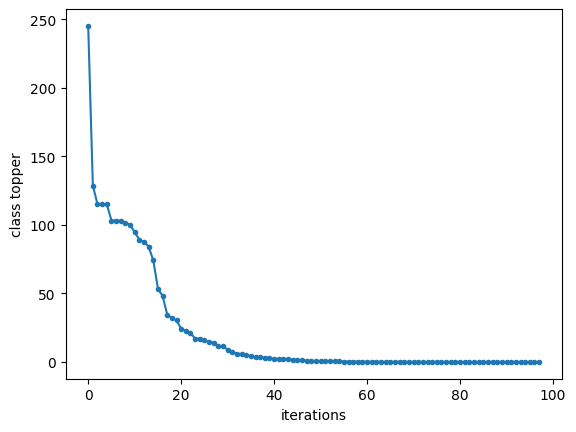

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define an objective function for evaluating student performance
def objective_function(student_marks):
    # Sum of absolute marks + Product of absolute marks
    x = np.sum(np.abs(student_marks))
    y = np.prod(np.abs(student_marks))
    return x + y

# Configuration parameters
section = 5          # Number of sections
student = 700        # Number of students per section
courses = 30         # Number of courses
exam = 100           # Number of exams/iterations
min_marks = -10      # Minimum possible marks
max_marks = 10       # Maximum possible marks
n1 = 1.6             # Learning factor for class topper
n2 = 1.4             # Learning factor for section topper
Iwf_min = 0.0        # Minimum inertia weight factor
Iwf_max = 0.5        # Maximum inertia weight factor
c1 = np.random.random()  # Random coefficient (not used in this code)
c2 = np.random.random()  # Random coefficient (not used in this code)

# Initialize arrays for storing marks, velocity (i), performance (p), and toppers
student_marks = np.zeros((exam, section, student, courses))         # Marks for each student in all exams
i = np.zeros((exam, section, student, courses), dtype=float)        # Velocity (change in marks)
p = np.full((exam, section, student), np.nan)                       # Performance of each student
section_topper_index = np.zeros((exam, section), dtype=int)         # Index of section topper
section_topper = np.zeros((exam, section))                          # Performance value of section topper
class_topper_index = np.zeros((exam, 2), dtype=int)                 # [Section, Student] index of class topper
class_topper_marks = np.zeros(exam)                                 # Performance value of class topper

# Main loop over all exams
for E in range(exam):
    print("Exam No:", E + 1)

    # Linearly decreasing inertia weight factor
    Iwf = Iwf_max - ((Iwf_max - Iwf_min) * E / exam)

    for SEC in range(section):  # Loop over each section
        for STD in range(student):  # Loop over each student
            for C in range(courses):  # Loop over each course
                if E == 0:
                    # For first exam, assign random marks
                    student_marks[E, SEC, STD, C] = np.random.uniform(min_marks, max_marks)
                else:
                    if STD == section_topper_index[E-1, SEC]:
                        # If the student was section topper in previous exam, learn from class topper
                        i[E, SEC, STD, C] = Iwf * i[E-1, SEC, STD, C] + \
                            (np.random.rand() * n1) * \
                            (student_marks[E-1, class_topper_index[E-1, 0], class_topper_index[E-1, 1], C] -
                             student_marks[E-1, SEC, STD, C])
                    else:
                        # Otherwise, learn from section topper
                        i[E, SEC, STD, C] = Iwf * i[E-1, SEC, STD, C] + \
                            (np.random.rand() * n2) * \
                            (student_marks[E-1, SEC, section_topper_index[E-1, SEC], C] -
                             student_marks[E-1, SEC, STD, C])

                    # Update marks
                    student_marks[E, SEC, STD, C] = student_marks[E-1, SEC, STD, C] + i[E, SEC, STD, C]

            # Clamp the marks to the allowed range
            student_marks[E, SEC, STD] = np.clip(student_marks[E, SEC, STD], min_marks, max_marks)

            # Calculate performance of the student using objective function
            p[E, SEC, STD] = objective_function(student_marks[E, SEC, STD])

        # Identify section topper based on minimum performance value
        section_topper_index[E, SEC] = np.argmin(p[E, SEC])
        section_topper[E, SEC] = np.min(p[E, SEC])

    # Identify class topper based on minimum among section toppers
    class_topper_marks[E] = np.min(section_topper[E])
    class_topper_index[E, 0] = np.argmin(section_topper[E])  # Section index
    class_topper_index[E, 1] = section_topper_index[E, np.argmin(section_topper[E])]  # Student index

    # If performance degrades, revert to previous exam's data
    if E > 0 and class_topper_marks[E-1] < class_topper_marks[E]:
        student_marks[E] = student_marks[E-1]
        p[E] = p[E-1]
        print("1")  # Indicates reversion
        section_topper_index[E] = section_topper_index[E-1]
        section_topper[E] = section_topper[E-1]
        class_topper_marks[E] = class_topper_marks[E-1]
        class_topper_index[E] = class_topper_index[E-1]

    # Print class topper marks for the current exam
    print("class_topper_marks", class_topper_marks[E])

# Plot class topper performance trend from 3rd exam onwards
plt.plot(class_topper_marks[2:], marker='.')
plt.xlabel('iterations')
plt.ylabel('class topper')
plt.show()


Exam No: 1
class_topper_marks 310178876.81045955
Exam No: 2
class_topper_marks 1907.5133980445626
Exam No: 3
class_topper_marks 88.74670497978762
Exam No: 4
1
class_topper_marks 88.74670497978762
Exam No: 5
1
class_topper_marks 88.74670497978762
Exam No: 6
1
class_topper_marks 88.74670497978762
Exam No: 7
class_topper_marks 84.236385990535
Exam No: 8
1
class_topper_marks 84.236385990535
Exam No: 9
class_topper_marks 76.13410535416847
Exam No: 10
class_topper_marks 72.05006654553358
Exam No: 11
class_topper_marks 67.21579907480498
Exam No: 12
class_topper_marks 64.31554638051065
Exam No: 13
class_topper_marks 57.848060055123916
Exam No: 14
class_topper_marks 52.431499130953775
Exam No: 15
class_topper_marks 48.653733840723284
Exam No: 16
class_topper_marks 47.20996992657168
Exam No: 17
class_topper_marks 43.98144315094749
Exam No: 18
class_topper_marks 41.90780429905041
Exam No: 19
class_topper_marks 37.8436492724819
Exam No: 20
class_topper_marks 34.58537055067278
Exam No: 21
class_top

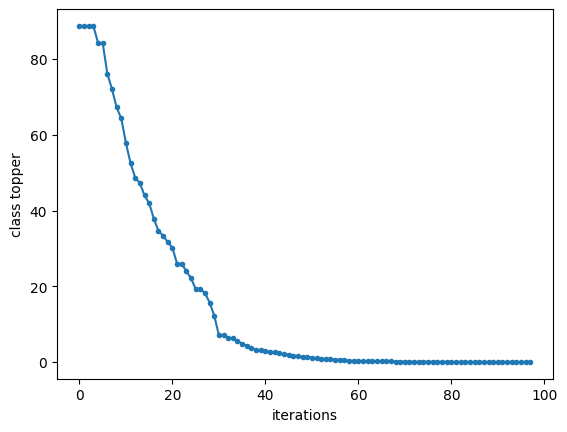